# Loading Audio Data & Extracting Features

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pyAudioAnalysis import MidTermFeatures as aF
import os


dirs = ["audio_data/habiba_train/", "audio_data/carol_train/", "audio_data/rana_train/", "audio_data/mohand_train/"]  
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
    
# (each element of the features list contains a 
# (samples x segment features) = (48 x 138) feature matrix)
print(features[0].shape, features[1].shape, features[2].shape, features[3].shape)


Analyzing file 1 of 48: audio_data/habiba_train\1.wav
Analyzing file 2 of 48: audio_data/habiba_train\11.wav
Analyzing file 3 of 48: audio_data/habiba_train\12.wav
Analyzing file 4 of 48: audio_data/habiba_train\13.wav
Analyzing file 5 of 48: audio_data/habiba_train\14.wav
Analyzing file 6 of 48: audio_data/habiba_train\15.wav
Analyzing file 7 of 48: audio_data/habiba_train\16.wav
Analyzing file 8 of 48: audio_data/habiba_train\17.wav
Analyzing file 9 of 48: audio_data/habiba_train\18.wav
Analyzing file 10 of 48: audio_data/habiba_train\2.wav
Analyzing file 11 of 48: audio_data/habiba_train\21.wav
Analyzing file 12 of 48: audio_data/habiba_train\22.wav
Analyzing file 13 of 48: audio_data/habiba_train\23.wav
Analyzing file 14 of 48: audio_data/habiba_train\24.wav
Analyzing file 15 of 48: audio_data/habiba_train\25.wav
Analyzing file 16 of 48: audio_data/habiba_train\26.wav
Analyzing file 17 of 48: audio_data/habiba_train\27.wav
Analyzing file 18 of 48: audio_data/habiba_train\28.wav
Ana

### Visualization of some selected Features

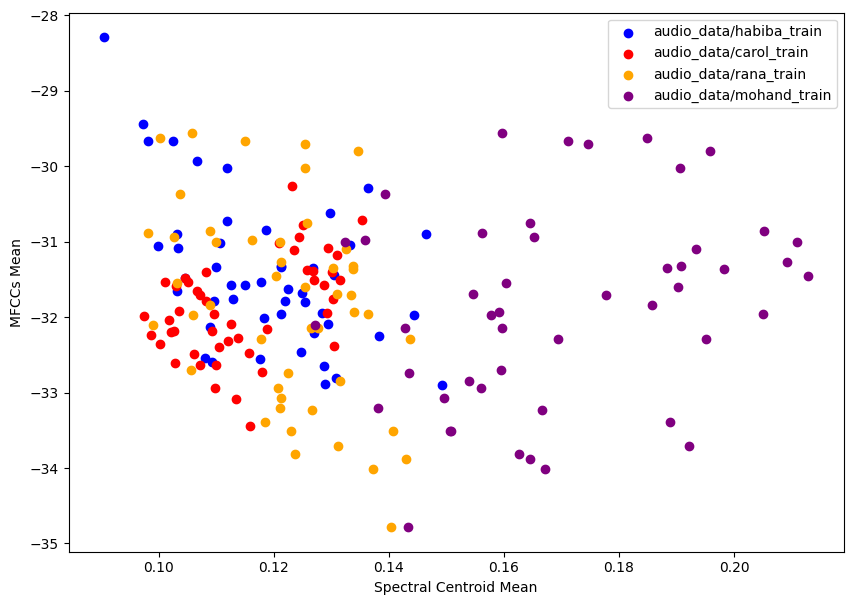

In [9]:
dirs = ["audio_data/habiba_train/", "audio_data/carol_train/", "audio_data/rana_train/", "audio_data/mohand_train/"]  
class_names = [os.path.dirname(d) for d in dirs]

f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('mfcc_1_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('mfcc_1_mean')]])
f3 = np.array([features[2][:, fn.index('spectral_centroid_mean')],
               features[2][:, fn.index('mfcc_1_mean')]])
f4 = np.array([features[3][:, fn.index('spectral_centroid_mean')],
               features[3][:, fn.index('mfcc_1_mean')]])

# Check if features were extracted
if f1 is not None and f2 is not None and f3 is not None and f4 is not None:
    # Plot features
    plt.figure(figsize=(10, 7))
    plt.scatter(x=f1[0, :],  y=f1[1, :], 
                    label=class_names[0], color='b')
    plt.scatter(x=f2[0, :], y=f2[1, :], 
                    label=class_names[1], color='r')
    plt.scatter(x=f3[0, :], y=f3[1, :], 
                    label=class_names[2], color='orange')
    plt.scatter(x=f4[0, :], y=f3[1, :], 
                    label=class_names[3], color='purple')
    plt.xlabel('Spectral Centroid Mean')
    plt.ylabel('MFCCs Mean')
    plt.legend()
    plt.show()
else:
    print("No features were extracted. Please check the directory paths and contents.")

# Training the SVM Model

In [10]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train

# train the svm classifier
extract_features_and_train(dirs, m_win, m_step, s_win, s_step, "svm_rbf", "svm_model")


Analyzing file 1 of 48: audio_data/habiba_train\1.wav
Analyzing file 2 of 48: audio_data/habiba_train\11.wav
Analyzing file 3 of 48: audio_data/habiba_train\12.wav
Analyzing file 4 of 48: audio_data/habiba_train\13.wav
Analyzing file 5 of 48: audio_data/habiba_train\14.wav
Analyzing file 6 of 48: audio_data/habiba_train\15.wav
Analyzing file 7 of 48: audio_data/habiba_train\16.wav
Analyzing file 8 of 48: audio_data/habiba_train\17.wav
Analyzing file 9 of 48: audio_data/habiba_train\18.wav
Analyzing file 10 of 48: audio_data/habiba_train\2.wav
Analyzing file 11 of 48: audio_data/habiba_train\21.wav
Analyzing file 12 of 48: audio_data/habiba_train\22.wav
Analyzing file 13 of 48: audio_data/habiba_train\23.wav
Analyzing file 14 of 48: audio_data/habiba_train\24.wav
Analyzing file 15 of 48: audio_data/habiba_train\25.wav
Analyzing file 16 of 48: audio_data/habiba_train\26.wav
Analyzing file 17 of 48: audio_data/habiba_train\27.wav
Analyzing file 18 of 48: audio_data/habiba_train\28.wav
Ana

In [11]:
from pyAudioAnalysis import audioTrainTest as aT
dirc = ['audio_data/habiba_test/', 'audio_data/carol_test/', 'audio_data/rana_test/', 'audio_data/mohand_test/']

for d in dirc:
    for filename in os.listdir(d):
        if os.path.isfile(os.path.join(d, filename)):
            print(f'{os.path.join(d, filename)}')
            c, p, p_nam = aT.file_classification(os.path.join(d, filename), "svm_model","svm_rbf")
            print(f'P({p_nam[0]}={p[0]})')
            print(f'P({p_nam[1]}={p[1]})')
            print(f'P({p_nam[2]}={p[2]})')
            print(f'P({p_nam[3]}={p[3]})')
            print()

audio_data/habiba_test/10.wav
P(audio_data/habiba_train/=0.991788533880148)
P(audio_data/carol_train/=0.003848847145804898)
P(audio_data/rana_train/=0.0021786314926213906)
P(audio_data/mohand_train/=0.0021839874814258108)

audio_data/habiba_test/19.wav
P(audio_data/habiba_train/=0.9076029983762598)
P(audio_data/carol_train/=0.015186242373846399)
P(audio_data/rana_train/=0.03448701435806398)
P(audio_data/mohand_train/=0.04272374489182951)

audio_data/habiba_test/20.wav
P(audio_data/habiba_train/=0.9248445322478912)
P(audio_data/carol_train/=0.024463742444603667)
P(audio_data/rana_train/=0.04897317446704712)
P(audio_data/mohand_train/=0.0017185508404580108)

audio_data/habiba_test/29.wav
P(audio_data/habiba_train/=0.9725091608790861)
P(audio_data/carol_train/=0.004715130423157072)
P(audio_data/rana_train/=0.0055389115660685875)
P(audio_data/mohand_train/=0.017236797131688263)

audio_data/habiba_test/30.wav
P(audio_data/habiba_train/=0.7911133315223798)
P(audio_data/carol_train/=0.1229684